# 1.Import the necessary libraries if you are starting a new notebook.

In [38]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings
#below removes warinings so it looks cleaner 
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

pd.set_option('display.max_columns', None) # want to see all the columns 

catigorical variables have more than one type read up on this !!!!!!!!!!
read differenece between continouous and discrete  


sometimes discreet and categorical are used interchangably 

- https://github.com/katoro-a/lab-cleaning-categorical-data 
- remember to push the repo back to git hub to save  

In [39]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [43]:
data.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [44]:
data['Effective To Date']=pd.to_datetime(data['Effective To Date'])
#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

# 2.Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [45]:
continuous_df = data.select_dtypes(np.number)
discrete_df = data.select_dtypes(np.object)

In [46]:
continuous_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [47]:
discrete_df.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# 3.Plot a correlation matrix, what can you see? 
    - comeback to this q  
    - Lab | customer analysis round 4 

In [48]:
corelationa_m_2 = data.corr()
corelationa_m_2 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


### What do you see ?
- monthly premium auto + customer lifetime value =0.4
- monthly premium auto + total claim amount = 0.63
-  if you make a claim your insurance will go up , not really strongly correlated 
- 
- 


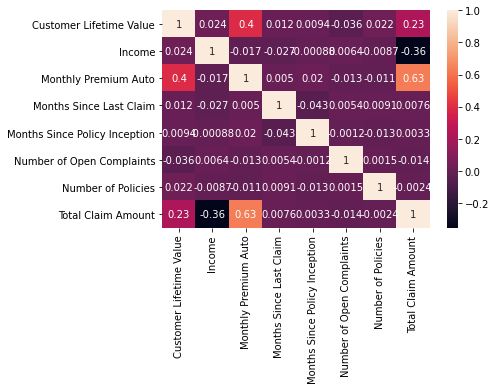

In [49]:
sns.heatmap(corelationa_m_2,annot=True)
plt.show()

### 4.Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [50]:
sns.pairplot(continuous_df)

Error in callback <function flush_figures at 0x7fb583fb9550> (for post_execute):


KeyboardInterrupt: 

In [51]:
data = data.drop(['Customer'],axis=1) 

In [54]:
# try making a list of the columns you want to plot 
discrete_col = discrete_df.drop(['Customer'],axis=1)
discrete_col = discrete_df.columns 
discrete_col

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

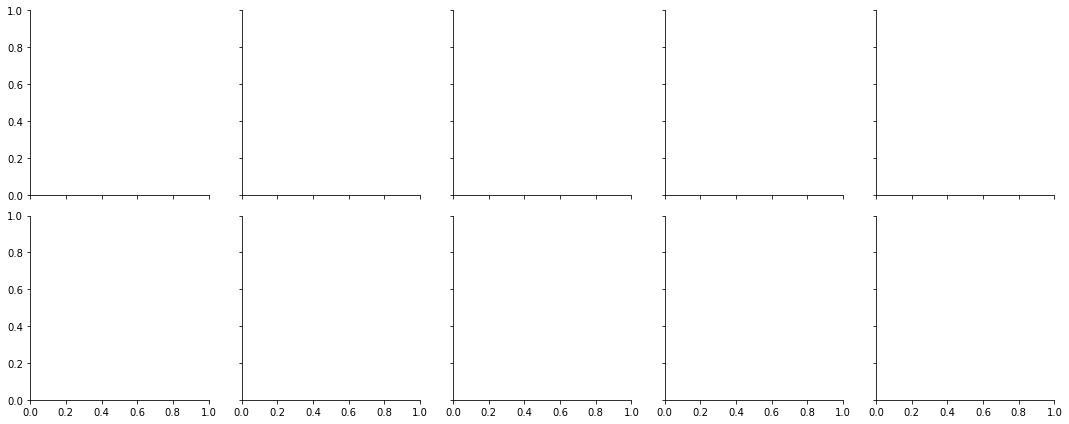

In [55]:
data_cat=data.select_dtypes(np.object) 
g=sns.FacetGrid(data_cat,col='State',row='Response') 
g.map(sns.scatterplot,'')


<AxesSubplot:>

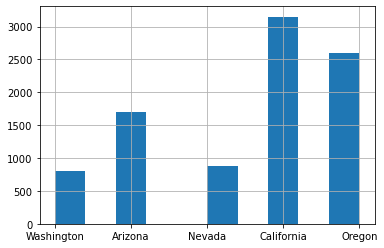

In [29]:
data['State'].hist()

In [56]:
#https://stackoverflow.com/questions/60421638/loop-over-columns-in-a-dataframe-to-produce-histograms-by-category
#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
#TRY USING -> seaborn.FacetGrid 






data_conti=data.select_dtypes(np.number)
data_conti



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [69]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html



#its better to create a x and a y , create y with a value count and then display 
def plot_discrete(y):
    plt.bar(x=data[y],height=100,width=0.8)
    plt.show()


def plot_continuous(x):
    data[x].hist()
    plt.show()

In [ ]:
plot_continuous('Months Since Last Claim') 
plot_discrete('State')

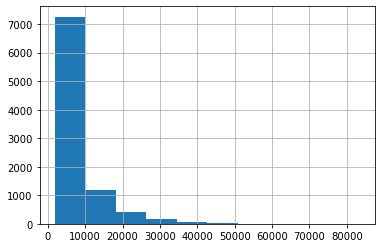

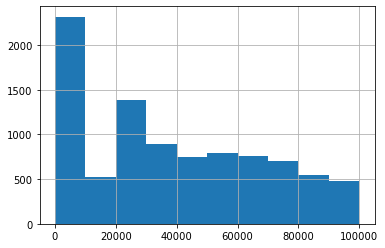

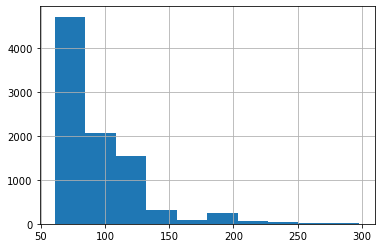

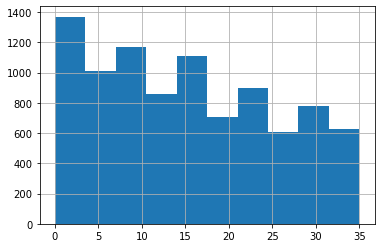

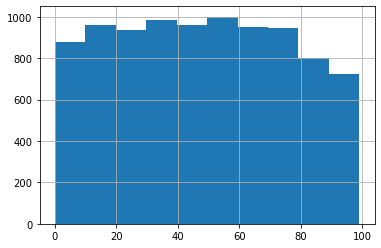

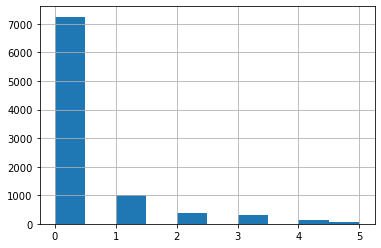

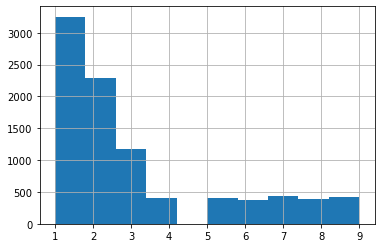

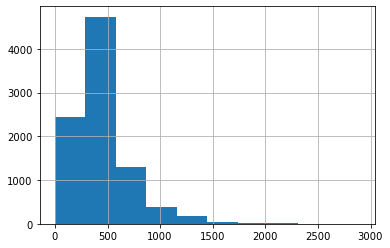

[None, None, None, None, None, None, None, None]

In [29]:
list(map(plot_continuous,data.select_dtypes(np.number).columns))

In [70]:
##BROKEN
#look at screen shot off matthews code 

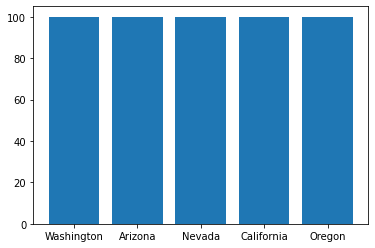

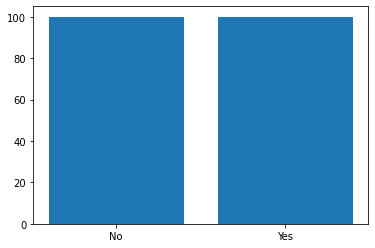

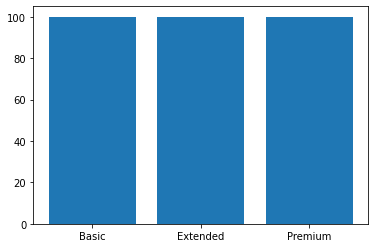

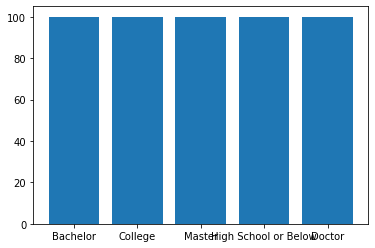

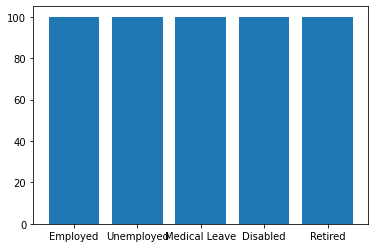

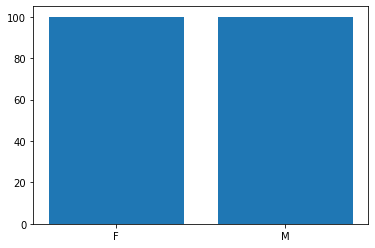

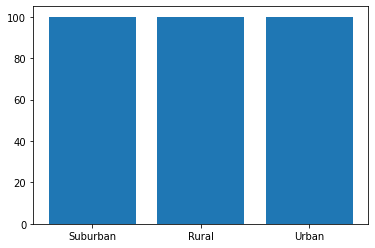

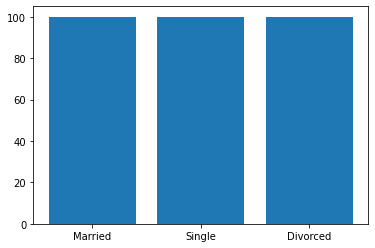

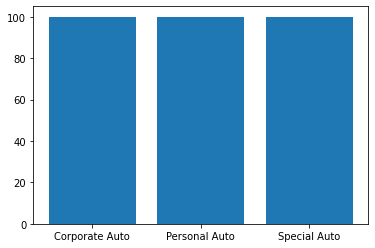

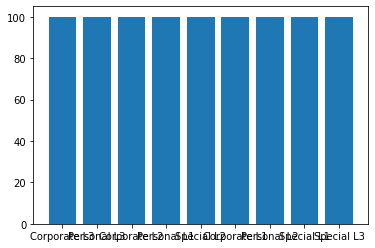

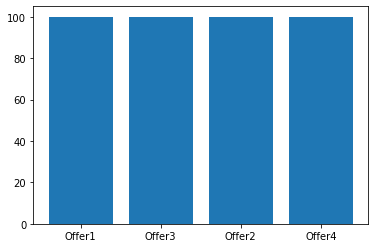

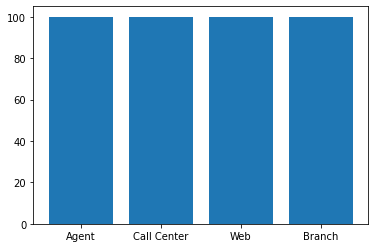

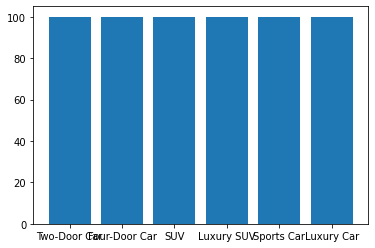

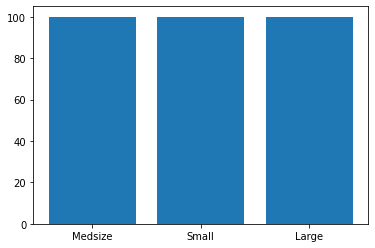

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [71]:
list(map(plot_discrete,data.select_dtypes(np.object).columns))

In [36]:
#create a loop that plots every graph    


    
#plot_discrete(discrete_col) 


hist for numerical 


Categorical 
bar plot of each column with value counts 
 
#--------------------------------------------------------------------------------------
#attempt 2 
for i, col in data(data.columns):
    plt.figure(i)
    sns.distplot(data[col])




TypeError: 'DataFrame' object is not callable

In [ ]:
data['C']

### 5.What can you see in the plots?

### 6.Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

### 7.Have you found outliers? If you have, what should we do with them? 


- create a loop of box plots to best identify which columns have outliers 
- then write a loop on how to clean up the outliers 
- first identify the iqr andthe other variables  

- but be careful with the iqr beacuse each column might need a different one !

- calculate the inner quartile ranges then filter out the outliers 

- #-------------------example code below -----------------------------#
- iqr = np.percentile(data['TIMELAG'],75)
- np.percentile(data['TIMELAG'],25)
- upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr 
- lower_limit = np.percentile(data['TIMELAG'],25) - 1.5*iqr
- print(upper_limit)
- print(lower_limit)

### 8.Check nan values per column.  

In [12]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### 9.Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [13]:
#same as last class check to see if the count of the number of unique variables is greater than a certain number and go with that 

In [73]:
def separate(df, columns):
    for col in columns:
        if len(df[col].value_counts())>100:
            print('Col: ', col, 'is continuous      $$$')
        else:
            print('*Col:',col,'is discrete ')
separate(data, data.columns) 


# you could have created 2 separate lists to save the columns to 

*Col: State is discrete 
Col:  Customer Lifetime Value is continuous      $$$
*Col: Response is discrete 
*Col: Coverage is discrete 
*Col: Education is discrete 
*Col: Effective To Date is discrete 
*Col: EmploymentStatus is discrete 
*Col: Gender is discrete 
Col:  Income is continuous      $$$
*Col: Location Code is discrete 
*Col: Marital Status is discrete 
Col:  Monthly Premium Auto is continuous      $$$
*Col: Months Since Last Claim is discrete 
*Col: Months Since Policy Inception is discrete 
*Col: Number of Open Complaints is discrete 
*Col: Number of Policies is discrete 
*Col: Policy Type is discrete 
*Col: Policy is discrete 
*Col: Renew Offer Type is discrete 
*Col: Sales Channel is discrete 
Col:  Total Claim Amount is continuous      $$$
*Col: Vehicle Class is discrete 
*Col: Vehicle Size is discrete 


### 10.for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [14]:
discrete_df.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
# try to create a loop to check the value counts of each variable

In [16]:
col=discrete_df.columns

In [17]:
def val_count_check(x):
    for items in x:
        return x.value_counts()

In [18]:
abba = list(map(val_count_check,data.columns))

AttributeError: 'str' object has no attribute 'value_counts'

In [19]:
discrete_df['State'].value_counts() 
discrete_df['Response'].value_counts()  
discrete_df['Coverage'].value_counts()  
discrete_df['Education'].value_counts()  
discrete_df['EmploymentStatus'].value_counts()   
discrete_df['Gender'].value_counts()   
discrete_df['Location Code'].value_counts()   

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [20]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 11.Get categorical features

In [21]:
def separate(df, columns):
    for col in columns:
        if len(df[col].value_counts())<100:
            print('Col: ', col, 'is categorical')
        else:
            print('Hello')
separate(data, data.columns)

Hello
Col:  State is categorical
Hello
Col:  Response is categorical
Col:  Coverage is categorical
Col:  Education is categorical
Col:  Effective To Date is categorical
Col:  EmploymentStatus is categorical
Col:  Gender is categorical
Hello
Col:  Location Code is categorical
Col:  Marital Status is categorical
Hello
Col:  Months Since Last Claim is categorical
Hello
Col:  Number of Open Complaints is categorical
Col:  Number of Policies is categorical
Col:  Policy Type is categorical
Col:  Policy is categorical
Col:  Renew Offer Type is categorical
Col:  Sales Channel is categorical
Hello
Col:  Vehicle Class is categorical
Col:  Vehicle Size is categorical


### 12. What should we do with the customer id column? 
- drop it we already have an index 

In [22]:

data=data.drop(['Customer'],axis=1)

In [23]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
